In [10]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from scipy import stats
plt.rcParams['figure.figsize'] = [10, 8]

df1 = pd.read_csv(os.getcwd() +"/../data/30_05_2018code_analysis__summery_report.csv")
df_robo = pd.read_csv(os.getcwd() +"/../data/proccesed1-29_05_2018.csv")
os.getcwd()



'/home/user/Notebooks'

In [11]:
df1_reduced = df1[df1['total_loc']>1000]
df1_reduced.shape
df1.groupby(['type']).count()

cbo_mode 
 dit_quantile_min 
 npa_quantile_ninety_five 
 dit_quantile_max 
 amloc_quantile_median 
 sc_quantile_lower 
 total_modules_with_defined_methods 
 anpm_mean 
 anpm_standard_deviation 
 dit_skewness 
 ... 
 dit_quantile_upper 
 dit_kurtosis 
 amloc_quantile_lower 
 acc_quantile_upper 
 npm_skewness 
 dit_standard_deviation 
 npa_skewness 
 noa_sum 
 accm_quantile_max 
 total_modules_with_defined_attributes 
 
 
 type 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 android 
 49 
 49 
 49 
 49 
 49 
 49 
 49 
 49 
 49 
 49 
 ... 
 49 
 49 
 49 
 49 
 49 
 49 
 49 
 49 
 49 
 49 
 
 
 arduino 
 31 
 36 
 33 
 36 
 36 
 36 
 36 
 36 
 36 
 36 
 ... 
 36 
 36 
 36 
 36 
 36 
 36 
 36 
 36 
 36 
 36 
 
 
 minecraft 
 36 
 36 
 36 
 36 
 36 
 36 
 37 
 36 
 36 
 36 
 ... 
 36 
 36 
 36 
 36 
 36 
 36 
 36 
 36 
 36 
 37 
 
 
 opengl 
 43 
 44 
 43 
 44 
 44 
 44 
 44 
 44 
 44 
 44 
 ... 
 44 
 44 
 44 
 44 
 44 
 44 
 44 
 44 
 44 
 44 
 
 
 ros 
 15 
 15 
 15 
 15 
 15 
 15 
 16 
 15 
 15 
 15 
 ... 
 15 
 15 
 15 
 15 
 15 
 15 
 15 
 15 
 15 
 16 
 
 
 spring-boot 
 47 
 47 
 47 
 47 
 47 
 47 
 47 
 47 
 47 
 47 
 ... 
 47 
 47 
 47 
 47 
 47 
 47 
 47 
 47 
 47 
 47 
 
 
 
 6 rows × 219 columns

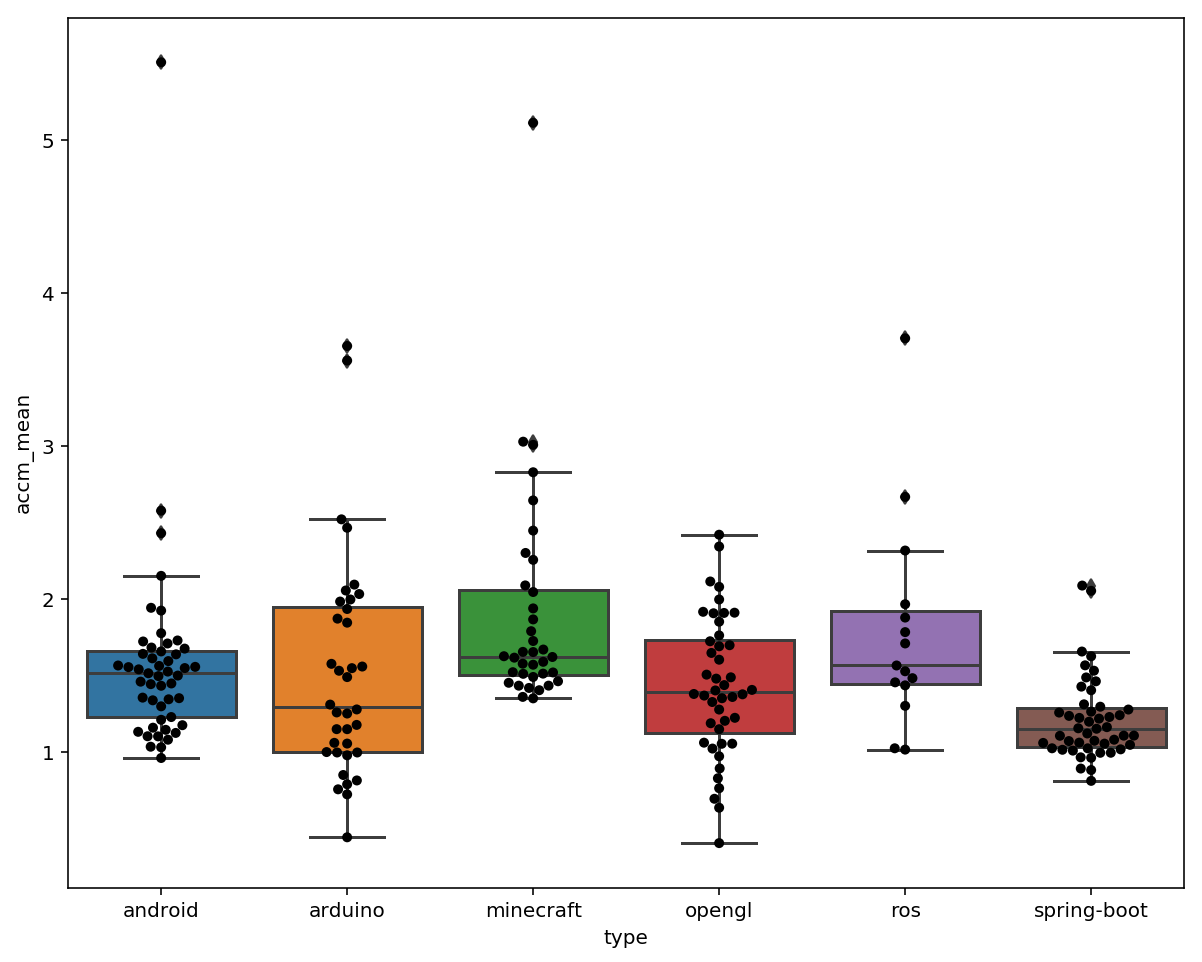

In [12]:
import seaborn as sns
import matplotlib
ax = sns.boxplot(x='type',y='accm_mean',data=df1)
ax = sns.swarmplot(x='type',y='accm_mean',data=df1,color='black')

In [13]:
df_robo = df_robo[df_robo['is_source']==True]
df_robo_reduced = df_robo[[a for a in list(df_robo) if 'analizo' in a  ] + ['source_lang'] + ['group_name']+['year']]
df_robo_reduced  =df_robo_reduced.fillna(0)

In [5]:
df_robo_reduced = df_robo_reduced[df_robo_reduced['analizo_total_loc']>1000]

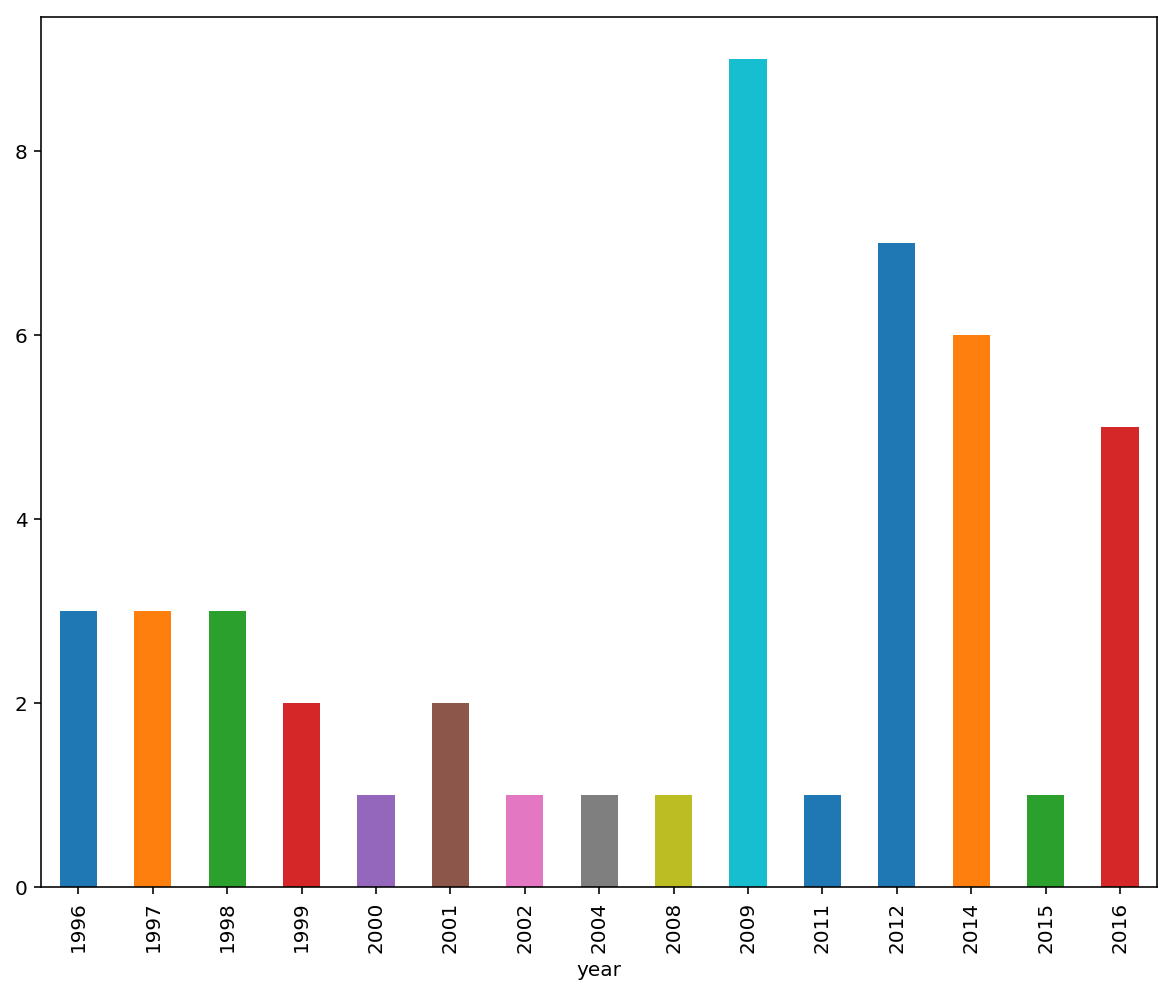

In [9]:
df_robo_reduced.groupby(by='year').agg('count')['analizo_total_loc'].plot(kind="bar")

In [7]:
df_robo_reduced = df_robo_reduced[[a for a in df_robo_reduced if 'analizo' in a]]
df_robo_reduced.columns = [a[8:] for a in df_robo_reduced]

In [8]:
df_robo_reduced['type']  = 'robo'
df_robo_reduced.head()

acc_kurtosis 
 acc_mean 
 acc_mode 
 acc_quantile_lower 
 acc_quantile_max 
 acc_quantile_median 
 acc_quantile_min 
 acc_quantile_ninety_five 
 acc_quantile_upper 
 acc_skewness 
 ... 
 total_abstract_classes 
 total_cof 
 total_eloc 
 total_loc 
 total_methods_per_abstract_class 
 total_modules 
 total_modules_with_defined_attributes 
 total_modules_with_defined_methods 
 total_nom 
 type 
 
 
 
 
 1 
 0.000000 
 9.500000 
 None 
 9.25 
 10.0 
 9.5 
 9.0 
 10 
 9.75 
 0.000000 
 ... 
 0.0 
 9.500000 
 916.0 
 1243.0 
 0.0 
 2.0 
 2.0 
 2.0 
 32.0 
 robo 
 
 
 2 
 0.000000 
 9.500000 
 None 
 9.25 
 10.0 
 9.5 
 9.0 
 10 
 9.75 
 0.000000 
 ... 
 0.0 
 9.500000 
 864.0 
 1151.0 
 0.0 
 2.0 
 2.0 
 2.0 
 32.0 
 robo 
 
 
 3 
 0.000000 
 0.000000 
 None 
 0.00 
 0.0 
 0.0 
 0.0 
 None 
 0.00 
 0.000000 
 ... 
 0.0 
 1.000000 
 2771.0 
 3008.0 
 0.0 
 1.0 
 1.0 
 1.0 
 41.0 
 robo 
 
 
 5 
 0.000000 
 3.333333 
 None 
 0.50 
 9.0 
 1.0 
 0.0 
 9 
 5.00 
 0.000000 
 ... 
 0.0 
 1.666667 
 1447.0 
 1338.0 
 0.0 
 3.0 
 2.0 
 3.0 
 31.0 
 robo 
 
 
 6 
 4.048916 
 8.655738 
 0 
 1.00 
 57.0 
 3.0 
 0.0 
 38 
 11.00 
 2.017751 
 ... 
 0.0 
 0.144262 
 6833.0 
 6425.0 
 0.0 
 61.0 
 48.0 
 41.0 
 376.0 
 robo 
 
 
 
 5 rows × 219 columns

In [9]:
df_merged= pd.concat([df_robo_reduced,df1])
df_merged = df_merged.set_index('type')
df_merged

/usr/local/lib/python3.5/dist-packages/ipykernel/__main__.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  if __name__ == '__main__':


In [10]:
df_merged
df_merged_grouped = df_merged.groupby(level=0).mean().transpose()

type                                        android     ...       spring-boot
acc_kurtosis                              65.677755     ...         34.919509
acc_mean                                   2.800491     ...          1.723879
acc_quantile_lower                         0.000000     ...          0.000000
acc_quantile_max                          89.816327     ...         50.276596
acc_quantile_median                        0.459184     ...          0.063830
acc_quantile_min                           0.000000     ...          0.000000
acc_quantile_upper                         1.948980     ...          1.207447
acc_skewness                               5.664224     ...          4.490235
acc_standard_deviation                     8.409450     ...          4.857599
acc_sum                                  704.530612     ...        455.382979
acc_variance                              98.693441     ...         44.188277
accm_kurtosis                             41.478168     ...     

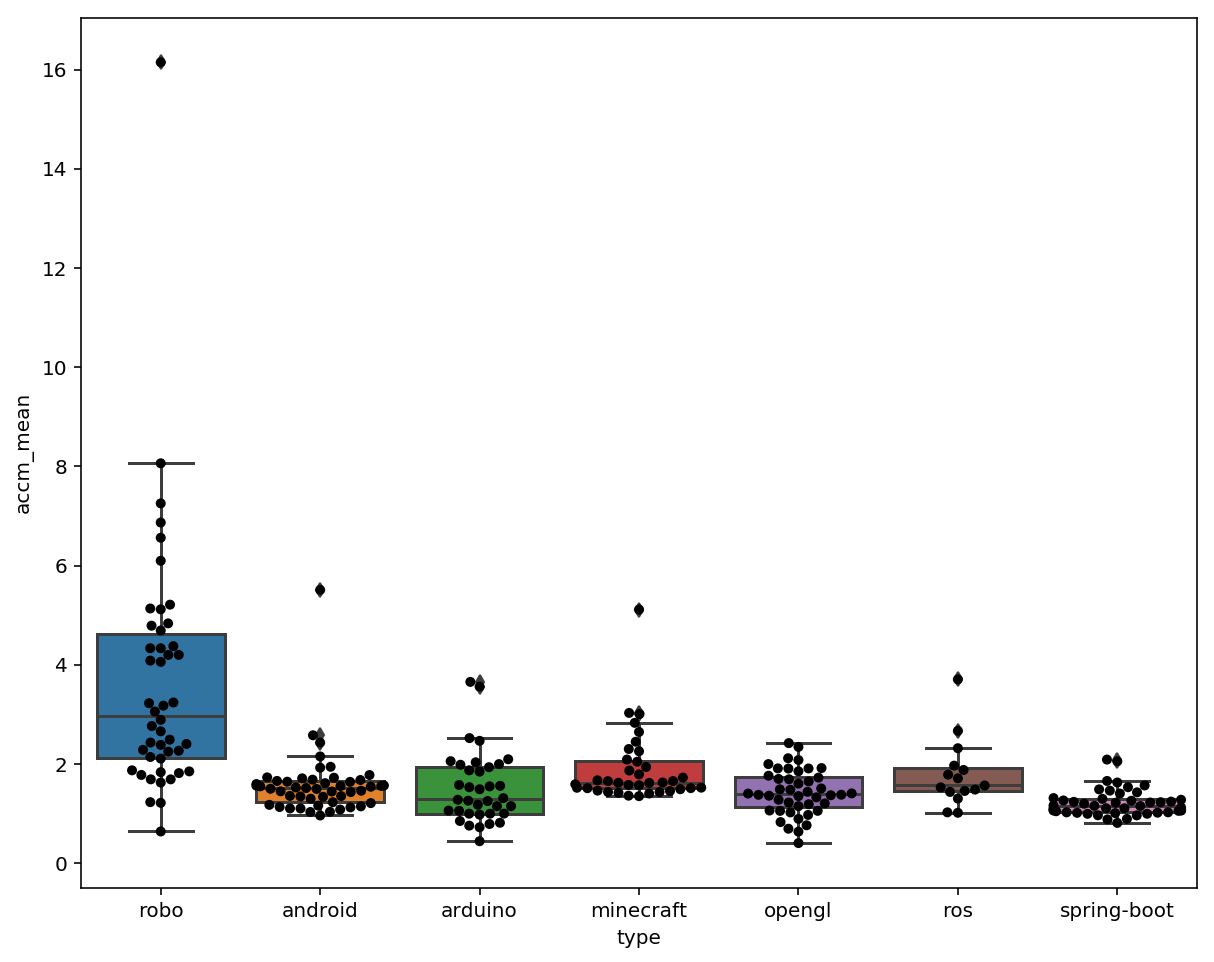

In [19]:
# for kind in mkr_dict:
#     d = df2[df2.type==kind]
#     plt.scatter(d.acc, d['loc'],marker = mkr_dict[kind])
#     plt.xlabel('acc')
#     plt.ylabel('loc')
#     plt.legend(cat)
# plt
import seaborn as sns
import matplotlib
ax = sns.boxplot(x=df_merged.index.get_level_values(0),y='accm_mean',data=df_merged)
ax = sns.swarmplot(x=df_merged.index.get_level_values(0),y='accm_mean',data=df_merged,color='black')

In [23]:
import numpy as np
col_order  = { i for i,v in enumerate(np.argsort(fit.scores_))]
col_order

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40]

In [12]:
s_robo_acc  = df_merged.loc['android']['acc_mean']
s_other_acc = df_merged[~df_merged.index.isin(['android','robo'])]['acc_mean']
stats.ks_2samp(s_robo_acc, s_other_acc)

Ks_2sampResult(statistic=0.1997732426303855, pvalue=0.08053056536136004)

In [13]:
#df2 = df_merged.sample(frac=1).reset_index(drop=True)
df3 = df_merged.select_dtypes(include=[np.number]).fillna(0)
# Create correlation matrix
corr_matrix =df3.corr()
# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
upper

186 180


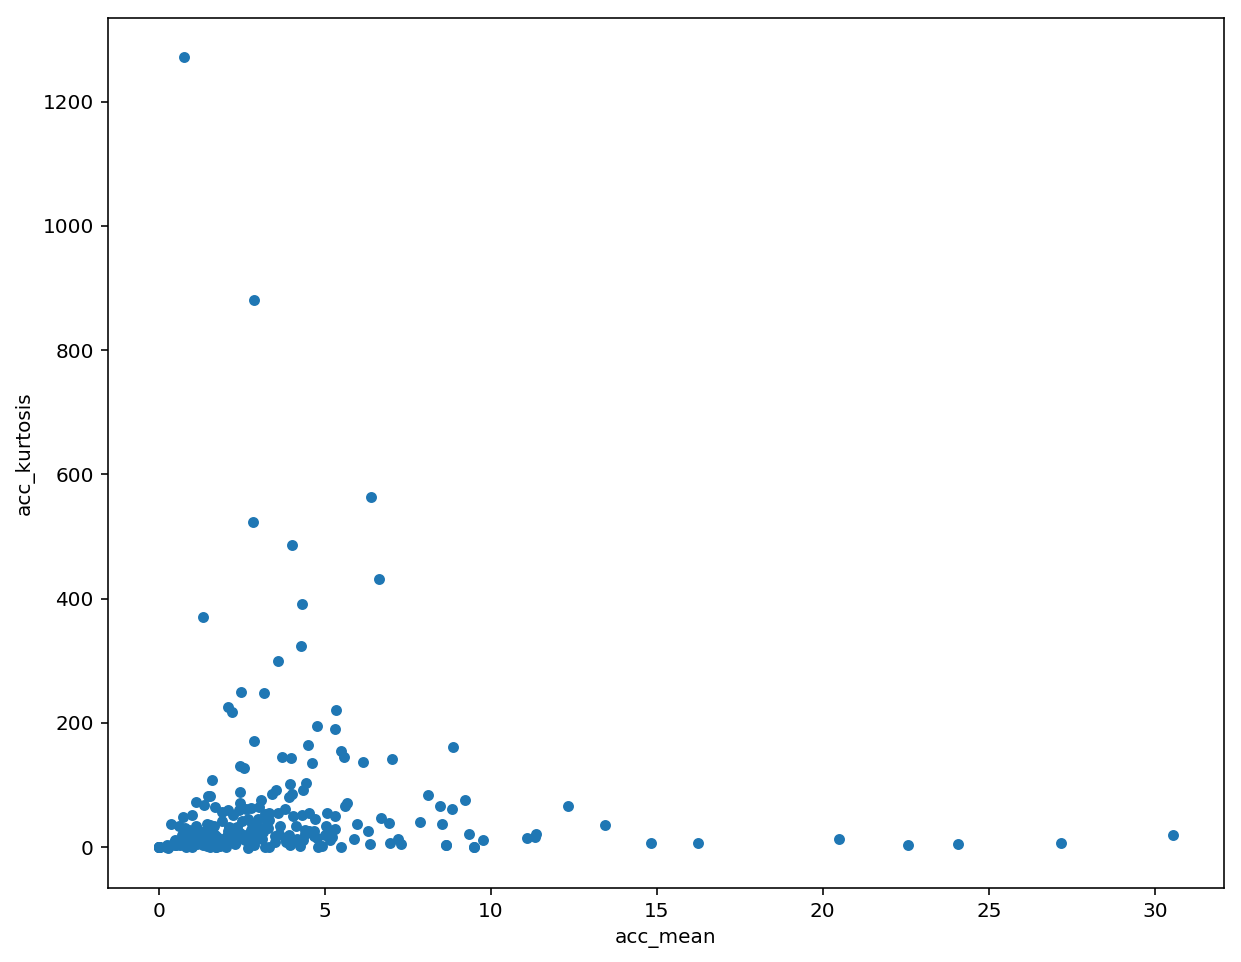

In [14]:
# Find index of feature columns with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] >0.10)]
to_drop
print (len(upper.columns),len(to_drop))
df3_dropped = df3[list(set(upper.columns)-set(to_drop))]
df3.plot.scatter(x='acc_mean',y='acc_kurtosis')

In [15]:
sns.pairplot()

TypeError: pairplot() missing 1 required positional argument: 'data'

In [0]:
pca = PCA(10)
pca_data = pca.fit_transform(df3)
df3.index.get_level_values(0)

In [16]:
df_pca = pd.DataFrame(pca_data)


NameError: name 'pca_data' is not defined

In [17]:
df_cat =pd.DataFrame(df_pca.iloc[:,-1:])
list(df_cat)

NameError: name 'df_pca' is not defined

In [18]:
kmeans = KMeans(n_clusters=2, random_state=1).fit(df_pca)
kmeans.labels_

NameError: name 'df_pca' is not defined

In [21]:
from sklearn.neural_network import MLPClassifier
df3 = df3.sample(frac=1).reset_index(drop=True)
X = df3.as_matrix()
y = pd.Categorical(df2.type).codes
df3 = df3[[a for a in df3 if 'sum' not in a  or 'total' not in a ]]

/usr/local/lib/python3.5/dist-packages/ipykernel/__main__.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  app.launch_new_instance()


NameError: name 'df2' is not defined

In [0]:
precil = int(X.shape[0]*0.9)
x_train = X[:precil]
y_train = y[:precil]
x_test  = X[precil:]
y_test  = y[precil:]

In [22]:
clf = MLPClassifier(hidden_layer_sizes=(200),max_iter=1000)
clf.fit(x_train, y_train)
clf.predict(x_test)

NameError: name 'x_train' is not defined

In [23]:
rf = RandomForestClassifier().fit(df_pca[,df_pca.iloc[:,-1:])
rf.predict(df_pca)

SyntaxError: invalid syntax (<ipython-input-23-1c1c4bcc2c9b>, line 1)

In [24]:
y_test

NameError: name 'y_test' is not defined

In [0]:
list(df3)


In [25]:
df1["total_loc"].sort_values()

171         0
110         0
66         16
62         26
83        112
157       151
50        169
126       260
131       328
16        356
38        365
49        382
54        426
67        444
223       470
228       485
125       530
59        532
191       533
63        562
183       640
22        701
13        772
151       810
33        865
224       886
227       895
52        896
195      1044
222      1077
        ...  
29      32606
53      33291
165     33918
180     35657
158     36044
114     36702
6       37956
74      40645
182     41979
133     41992
113     43065
134     43557
43      45277
149     48127
37      49509
92      52826
164     55791
138     60667
97      62145
105     74760
146     77189
155     86922
137     97464
2      101696
136    114080
162    126798
81     131057
135    165701
129    175871
141    204038
Name: total_loc, Length: 229, dtype: int64

In [26]:
df1.sort_values(by=["total_loc"], ascending=False)[[""]"total_loc"]

SyntaxError: invalid syntax (<ipython-input-26-c4492ee5f778>, line 1)